<a href="https://colab.research.google.com/github/dariabokareva/datascience/blob/master/neural-networks/nlp/imdb/dl_nlp_imdb_simple_rnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Определение тональности текста отзывов на фильмы IMDB с помощью рекуррентной нейронной сети

In [1]:
%tensorflow_version 2.x
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, SimpleRNN 
from tensorflow.keras import utils
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

## Загружаем данные

In [2]:
max_words=10000

In [3]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_words)

17473536/17464789 [==============================] - 0s 0us/step


## Подготовка данных для обучения

In [4]:
maxlen = 200

In [5]:
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

In [6]:
x_train[5002]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    1,  103,   51,   13,  197,   16,    6, 4796,
        239,    7,  107,  555,   11,  132,   39, 8921, 1872,  138,   16,
       4093, 1768, 2959,   34, 1620,    2,   11,    4,  755,   12,   43,
        286,    4,  172,  209,    2,    5, 5938,   17, 1000,   34, 1768,
        279,   29, 3892,   89,  338,    4,  114,   16, 1240, 1747,  103,
       3844, 3819,    8,  169, 2875,  112, 7062,   34,  160,  132,   29,
        100,   24,  535,  101,  250,    8,  858,   15,  196,   19,   57,
       3154,   39,   90,    5,   24,  169, 3533,   

## Создание нейронной сети

In [7]:
model = Sequential()
model.add(Embedding(max_words, 2, input_length=maxlen))
model.add(SimpleRNN(8))
model.add(Dense(1, activation='sigmoid'))

In [8]:
model.compile(optimizer='rmsprop', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

## Обучаем нейронную сеть

In [9]:
history = model.fit(x_train, 
                    y_train, 
                    epochs=15,
                    batch_size=128,
                    validation_split=0.1)

Epoch 1/15
176/176 [==============================] - 34s 172ms/step - loss: 0.6918 - accuracy: 0.5245 - val_loss: 0.6892 - val_accuracy: 0.5388
Epoch 2/15
176/176 [==============================] - 31s 176ms/step - loss: 0.6411 - accuracy: 0.6657 - val_loss: 0.5956 - val_accuracy: 0.7144
Epoch 3/15
176/176 [==============================] - 31s 174ms/step - loss: 0.4708 - accuracy: 0.8180 - val_loss: 0.4353 - val_accuracy: 0.8196
Epoch 4/15
176/176 [==============================] - 31s 173ms/step - loss: 0.3612 - accuracy: 0.8628 - val_loss: 0.3730 - val_accuracy: 0.8488
Epoch 5/15
176/176 [==============================] - 31s 176ms/step - loss: 0.2994 - accuracy: 0.8871 - val_loss: 0.3454 - val_accuracy: 0.8580
Epoch 6/15
176/176 [==============================] - 30s 172ms/step - loss: 0.2632 - accuracy: 0.9024 - val_loss: 0.3319 - val_accuracy: 0.8628
Epoch 7/15
176/176 [==============================] - 30s 172ms/step - loss: 0.2337 - accuracy: 0.9155 - val_loss: 0.3662 - val_ac

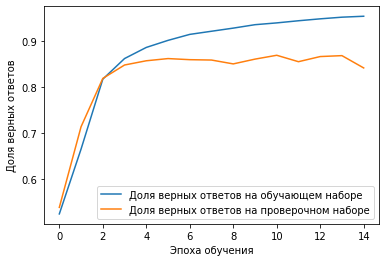

In [10]:
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

## Проверяем работу сети на тестовом наборе данных

In [11]:
scores = model.evaluate(x_test, y_test, verbose=1)

782/782 [==============================] - 13s 17ms/step - loss: 0.3939 - accuracy: 0.8389
